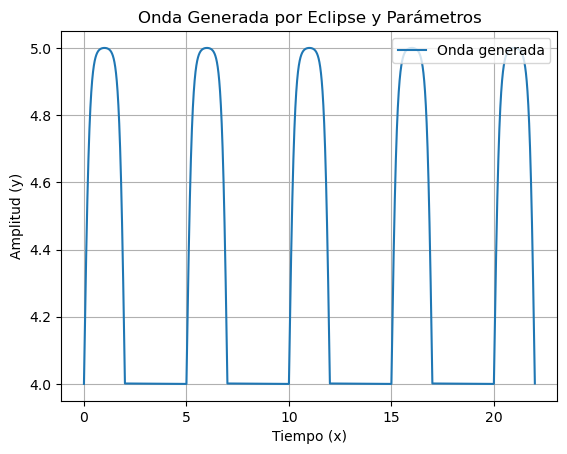

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipj

# Función step equivalente
def step(x):
    return 1 if x >= 0 else 0

# Función principal jacobi
def jacobi(A, m, E, S, R, V, W):
    k = np.sqrt(m)  # m = k^2, así que k = sqrt(m)
    PHI = np.pi / 2
    x_vals = []
    y_vals = []

    # Cálculo de la integral elíptica completa de primer tipo
    K_value = ellipk(m)

    for n in range(int(W)):
        # Genera valores de u para un solo periodo y ajusta el desplazamiento para el siguiente periodo
        u_vals = np.arange(0, 2.0 * K_value, R)
        
        for u in u_vals:
            # Calcula las funciones elípticas sn, cn y dn
            sn, cn, dn, ph = ellipj(u, m)
            # Onda cuadrada
            square_wave = step(u) - step(u - 2 * K_value)
            # Coordenadas
            x = E * u / (2 * K_value) + (E + S) * n
            y = square_wave * sn * A + V
            x_vals.append(x)
            y_vals.append(y)

    return np.array(x_vals), np.array(y_vals)

# Función para capturar los inputs
def enter():
    A = float(input("Ingresa la amplitud del eclipse:\n"))
    E = float(input("Ingresa el periodo del eclipse:\n"))
    S = float(input("Ingresa el periodo no eclipsado:\n"))
    V = float(input("Ingresa el traslado vertical:\n"))
    W = float(input("Ingresa el número de eclipses:\n"))
    R = float(input("Ingresa la resolución:\n"))
    m = float(input("Ingresa el módulo (0 < m < 1):\n"))
    
    x_vals, y_vals = jacobi(A, m, E, S, R, V, W)
    
    # Graficar los resultados
    plt.plot(x_vals, y_vals, label="Onda generada")
    plt.xlabel('Tiempo (x)')
    plt.ylabel('Amplitud (y)')
    plt.title('Onda Generada por Eclipse y Parámetros')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    enter()


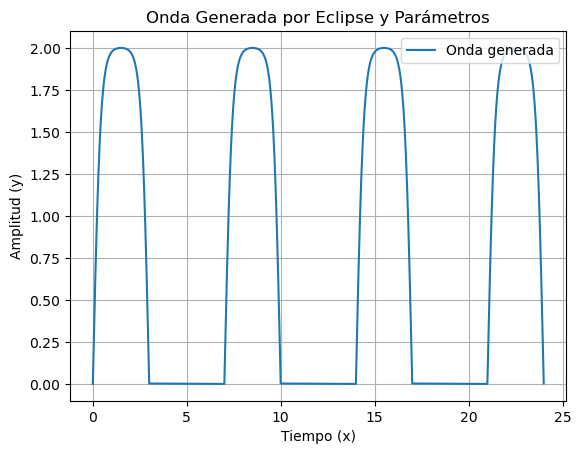

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipj

# Función step equivalente
def step(x):
    return 1 if x >= 0 else 0

# Función principal jacobi
def jacobi(A, m, E, S, R, V, W):
    k = np.sqrt(m)  # m = k^2, así que k = sqrt(m)
    PHI = np.pi / 2
    x_vals = []
    y_vals = []

    # Cálculo de la integral elíptica completa de primer tipo
    K_value = ellipk(m)

    for n in range(int(W)):
        # Genera valores de u para un solo periodo y ajusta el desplazamiento para el siguiente periodo
        u_vals = np.arange(0, 2.0 * K_value, R)
        
        for u in u_vals:
            # Calcula las funciones elípticas sn, cn y dn
            sn, cn, dn, ph = ellipj(u, m)
            # Onda cuadrada
            square_wave = step(u) - step(u - 2 * K_value)
            # Coordenadas
            x = E * u / (2 * K_value) + (E + S) * n
            y = square_wave * sn * A + V
            x_vals.append(x)
            y_vals.append(y)

    return np.array(x_vals), np.array(y_vals)

# Función para capturar los inputs
def enter():
    A = float(input("Ingresa la amplitud del eclipse:\n"))
    E = float(input("Ingresa el periodo del eclipse:\n"))
    S = float(input("Ingresa el periodo no eclipsado:\n"))
    V = float(input("Ingresa el traslado vertical:\n"))
    W = float(input("Ingresa el número de eclipses:\n"))
    R = float(input("Ingresa la resolución:\n"))
    m = float(input("Ingresa el módulo (0 < m < 1):\n"))
    
    x_vals, y_vals = jacobi(A, m, E, S, R, V, W)
    
    # Guardar los resultados en un archivo output.dat
    np.savetxt("output.dat", np.column_stack((x_vals, y_vals)), header="Tiempo (x) \t Amplitud (y)", comments="")

    # Graficar los resultados
    plt.plot(x_vals, y_vals, label="Onda generada")
    plt.xlabel('Tiempo (x)')
    plt.ylabel('Amplitud (y)')
    plt.title('Onda Generada por Eclipse y Parámetros')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    enter()


In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipj

# Función suave (transición con seno)
def smooth_step(x, width=0.1):
    """
    Función suave que utiliza un seno para suavizar la transición de una onda cuadrada.
    width: controla la anchura de la transición (cuanto más pequeño, más pronunciada será la transición).
    """
    return (np.tanh((x - 0.5) / width))  # Transición suave en el intervalo [0, 1]

# Función principal jacobi
def jacobi(A, m, E, S, R, V, W):
    k = np.sqrt(m)  # m = k^2, así que k = sqrt(m)
    PHI = np.pi / 2
    x_vals = []
    y_vals = []

    # Cálculo de la integral elíptica completa de primer tipo
    K_value = ellipk(m)

    for n in range(int(W)):
        # Genera valores de u para un solo periodo y ajusta el desplazamiento para el siguiente periodo
        u_vals = np.arange(0, 2.0 * K_value, R)
        
        for u in u_vals:
            # Calcula las funciones elípticas sn, cn y dn
            sn, cn, dn, ph = ellipj(u, m)
            # Suavizamos la onda cuadrada con la función smooth_step
            smooth_wave = smooth_step(u / (2 * K_value)) - smooth_step((u - 2 * K_value) / (2 * K_value))

            # Coordenadas
            x = E * u / (2 * K_value) + (E + S) * n
            y = smooth_wave * sn * A + V
            x_vals.append(x)
            y_vals.append(y)

    return np.array(x_vals), np.array(y_vals)

# Función para capturar los inputs
def enter():
    A = float(input("Ingresa la amplitud del eclipse:\n"))
    E = float(input("Ingresa el periodo del eclipse:\n"))
    S = float(input("Ingresa el periodo no eclipsado:\n"))
    V = float(input("Ingresa el traslado vertical:\n"))
    W = float(input("Ingresa el número de eclipses:\n"))
    R = float(input("Ingresa la resolución:\n"))
    m = float(input("Ingresa el módulo (0 < m < 1):\n"))
    
    x_vals, y_vals = jacobi(A, m, E, S, R, V, W)
    
    # Graficar los resultados
    plt.plot(x_vals, y_vals, label="Onda generada")
    plt.xlabel('Tiempo (x)')
    plt.ylabel('Amplitud (y)')
    plt.title('Onda Generada por Eclipse y Parámetros')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    enter()
